# plot_decision_regions

In [ ]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

        # konfiguruje generator znaczników i mapę kolorów
        markers = ('s', 'x', 'o', '^', 'v')
        colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
        cmap = ListedColormap(colors[:len(np.unique(y))])

        # rysuje wykres powierzchni decyzyjnej
        x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
        Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
        Z = Z.reshape(xx1.shape)
        plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
        plt.xlim(xx1.min(), xx1.max())
        plt.ylim(xx2.min(), xx2.max())

        # rysuje wykres wszystkich próbek
        for idx, cl in enumerate(np.unique(y)):
            plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl, edgecolor='black')

# Zadanie

##1. Rozdziel zestaw danych na podzbiory uczący i testowy,

In [ ]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:, [1,2]]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1, stratify=y)

##2. Sprawdź działanie drzewa dla entropii i współczynnika Giniego - porównaj wyniki i uargumentuj rezultaty.
Przykład tworzenia drzewa decyzyjnego znajduje się poniżej.
Dokumentacja klasy którą można wykorzystać do kostrukcji drzewa decyzyjnego znajduję się w linku poniżej.

[DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

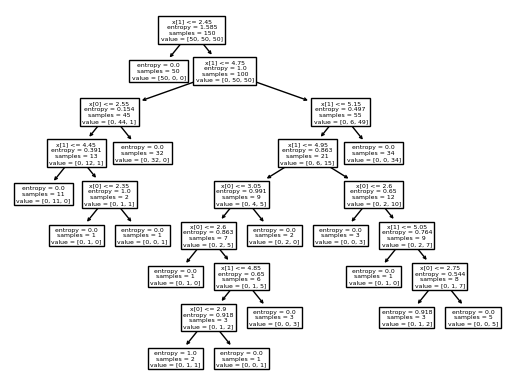

<ipython-input-1-d00c8c4ad389>:30: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl, edgecolor='black')
<ipython-input-1-d00c8c4ad389>:30: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl, edgecolor='black')


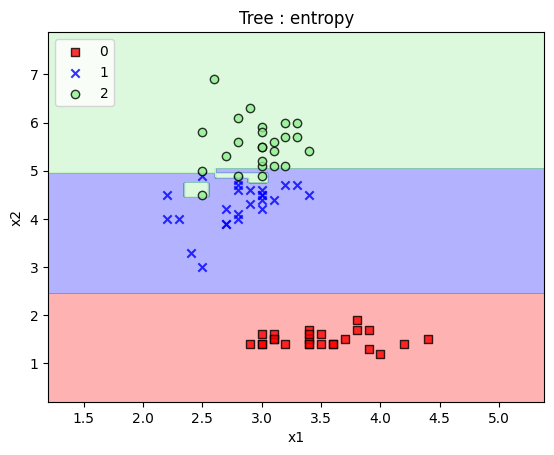

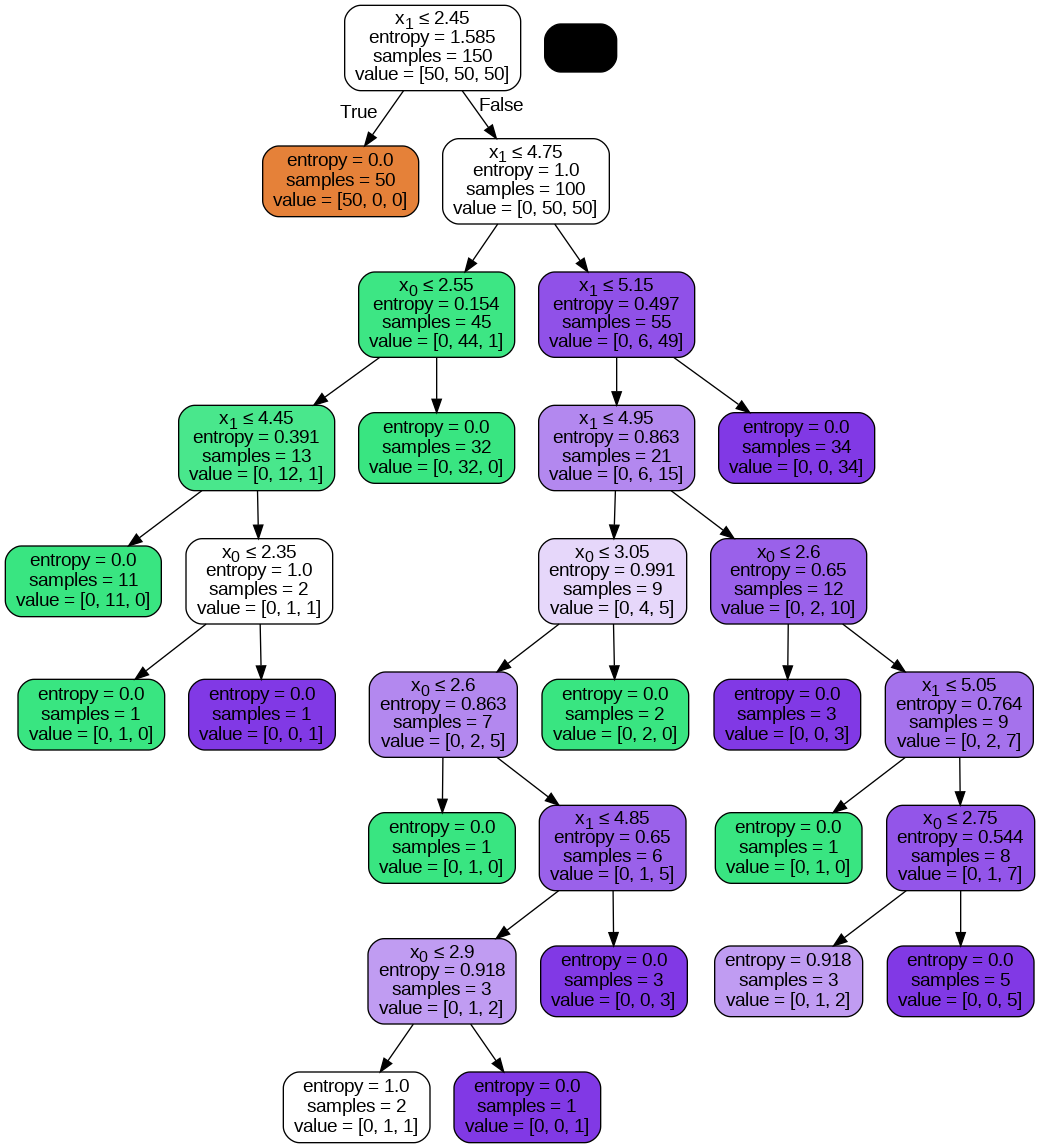

In [ ]:
clf = tree.DecisionTreeClassifier(criterion='entropy') # Uzupełnić parametry konstruktora
clf = clf.fit(X, y)
tree.plot_tree(clf)
plt.show()

plot_decision_regions(X=X_test, y=y_test, classifier=clf)
plt.title('Tree : entropy')
plt.xlabel(r'x1')
plt.ylabel(r'x2')
plt.legend(loc='upper left')
plt.show()

dat = export_graphviz(clf, out_file=None,
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dat)
graph.write_png('diabetes.png')
Image(graph.create_png())
#Drzewo decyzyjne entropy rozbudowywuje się bardziej na dwie gałęzie w czym nieuporządkowane gałęzie pozwalają lepiej ustalić wpływa atrybutów na decyzje przy nauce drzewa

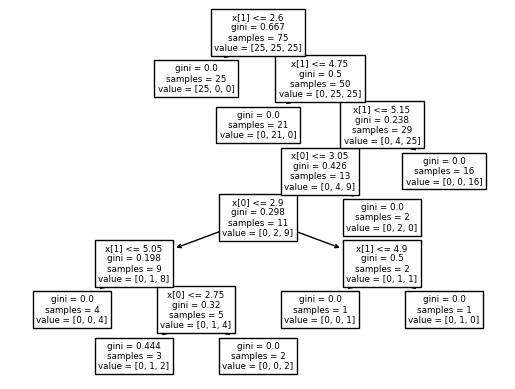

<ipython-input-1-d00c8c4ad389>:30: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl, edgecolor='black')
<ipython-input-1-d00c8c4ad389>:30: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl, edgecolor='black')


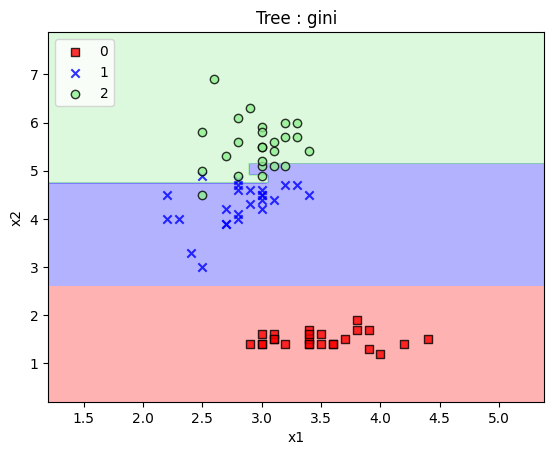

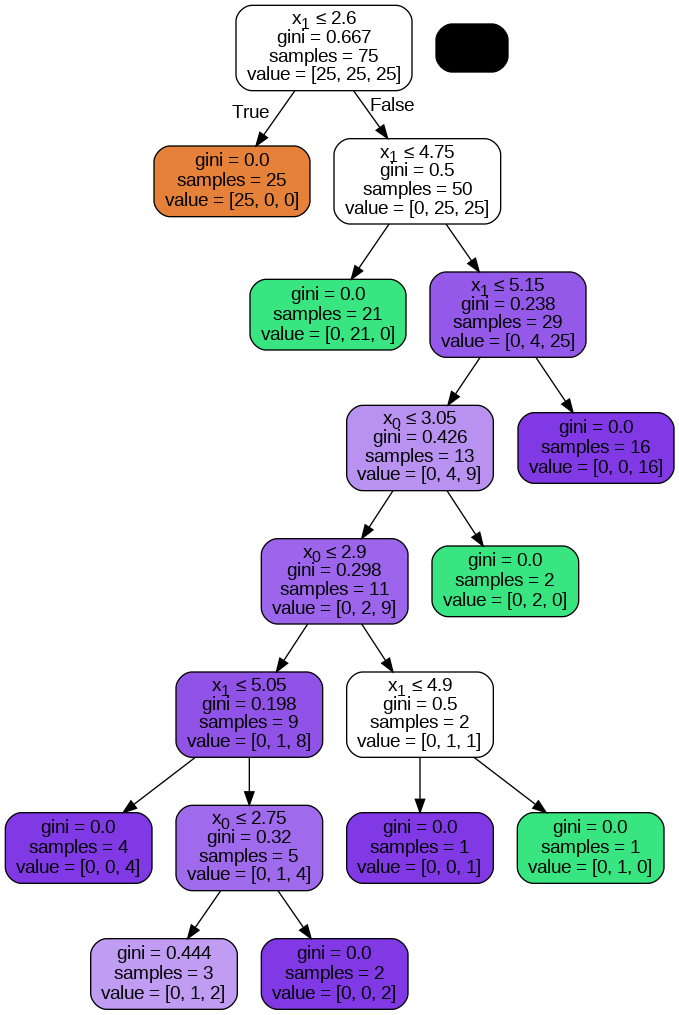

In [ ]:
gini = tree.DecisionTreeClassifier(criterion='gini') # Uzupełnić parametry konstruktora
gini = gini.fit(X_train, y_train)
tree.plot_tree(gini)
plt.show()

plot_decision_regions(X=X_test, y=y_test, classifier=gini)
plt.title('Tree : gini')
plt.xlabel(r'x1')
plt.ylabel(r'x2')
plt.legend(loc='upper left')
plt.show()

dat = export_graphviz(gini, out_file=None,
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dat)
graph.write_png('gini.png')
Image(graph.create_png())

#Za to drzewo Giniego jest lepiej uporządkowane oraz mierzy poziom koncetracji rozkładu losowej, indeks słuzy do klasyfikacji
#Jednak można zauwazyc ze wykres entropy oraz giniego wyglądają inaczej przy klasyfiacji best, jesli chodzi o wykres
#Oba podejścia wykorzystują teorię informacji, aby wybrać najlepszy atrybut dla podziału.
#Miara przyrostu entropii jest bardziej skuteczna w przypadku zmiennych o dużej liczbie kategorii, podczas gdy wskaźnik Giniego jest bardziej skuteczny w przypadku zmiennych o mniejszej liczbie kategorii.

##3. Sprawdź działanie drzewa dla różnych głębokości drzewa - porównaj wyniki i uargumentuj rezultaty,

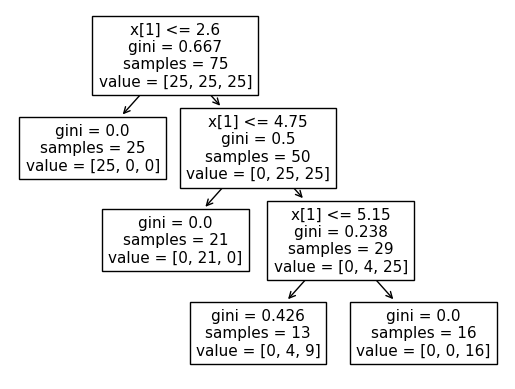

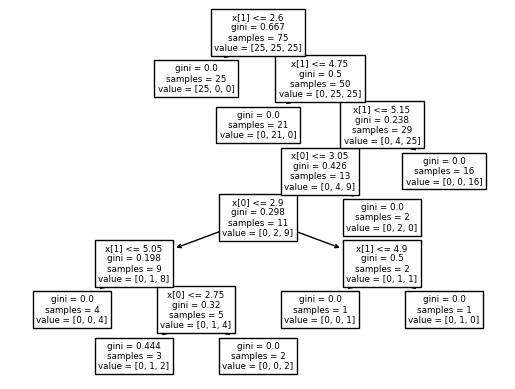

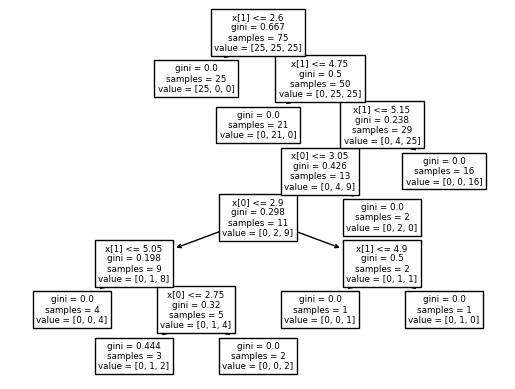

In [ ]:
gini.max_depth=3
gini = gini.fit(X_train, y_train)
plt.title('Tree : Gini -depth 3')
tree.plot_tree(gini)
plt.show()

gini.max_depth=8
gini = gini.fit(X_train, y_train)
plt.title('Tree : Gini -depth 8')
tree.plot_tree(gini)
plt.show()

gini.max_depth=15
gini = gini.fit(X_train, y_train)
plt.title('Tree : Gini -depth 15')
tree.plot_tree(gini)
plt.show()

#Niska głebokośc drzewa może doprowadzić do underfittingu
#Im wiecej klas tym glębokość drzewa bardziej sprzyja, powoduje to większe zróznicowanie
#Wysoka głebokośc drzewa może doprowadzić natomiast do overfittingu

##4. Sprawdź działanie lasów losowych dla różnej liczby drzew decyzyjnych - porównaj wyniki i uargumentuj rezultaty.

# Program

<ipython-input-1-d00c8c4ad389>:30: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl, edgecolor='black')
<ipython-input-1-d00c8c4ad389>:30: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl, edgecolor='black')


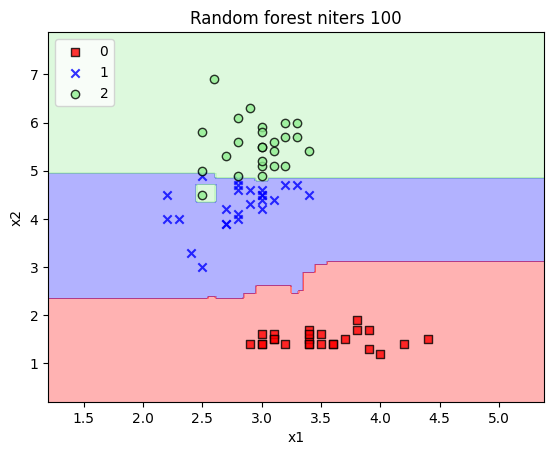

<ipython-input-1-d00c8c4ad389>:30: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl, edgecolor='black')
<ipython-input-1-d00c8c4ad389>:30: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl, edgecolor='black')


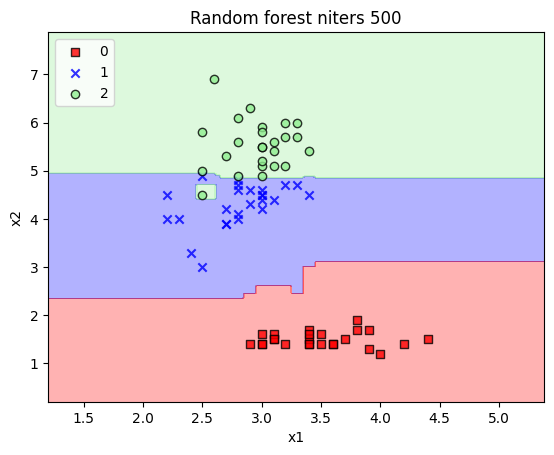

<ipython-input-1-d00c8c4ad389>:30: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl, edgecolor='black')
<ipython-input-1-d00c8c4ad389>:30: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl, edgecolor='black')


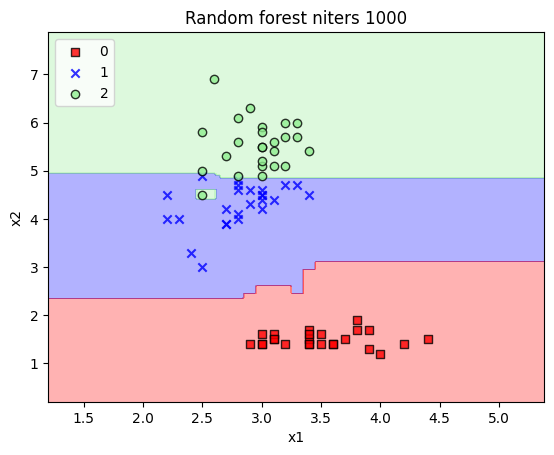

In [ ]:
small_forest_classifier = RandomForestClassifier(criterion='log_loss',n_estimators = 100)
small_forest_classifier.fit(X_test, y_test)
plot_decision_regions(X=X_test, y=y_test, classifier=small_forest_classifier)
plt.title('Random forest niters 100')
plt.xlabel(r'x1')
plt.ylabel(r'x2')
plt.legend(loc='upper left')
plt.show()

small_forest_classifier = RandomForestClassifier(criterion='log_loss',n_estimators = 500)
small_forest_classifier.fit(X_test, y_test)
plot_decision_regions(X=X_test, y=y_test, classifier=small_forest_classifier)
plt.title('Random forest niters 500')
plt.xlabel(r'x1')
plt.ylabel(r'x2')
plt.legend(loc='upper left')
plt.show()

small_forest_classifier = RandomForestClassifier(criterion='log_loss',n_estimators = 10000)
small_forest_classifier.fit(X_test, y_test)
plot_decision_regions(X=X_test, y=y_test, classifier=small_forest_classifier)
plt.title('Random forest niters 1000')
plt.xlabel(r'x1')
plt.ylabel(r'x2')
plt.legend(loc='upper left')
plt.show()

#log loss mierzy jakość prawdopodobieństwa przewidywań klasy. Im mniejsza wartość log loss, tym lepsze są predykcje.
#Wraz ze wzrostem liczby drzew, wartośc log loss spada ponieważ las jest bardzo zlozony i ma lepsze reprezentowanie danych
#Zwiększanie liczby drzew w lesie losowym powoduje także zwiększenie czasu obliczeń i może prowadzić do overfittingu